#### Tokenizer Serialization & Reload System from Scratch

Text: low lowest unknown
Encoded: [4, 6, 1]
Decoded: low lowest <UNK>
✔ Tokenizer reload integrity verified!


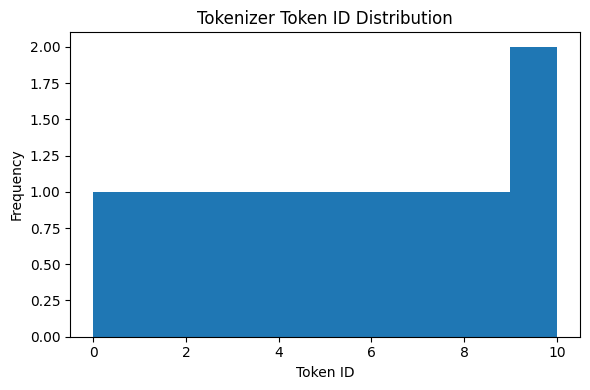

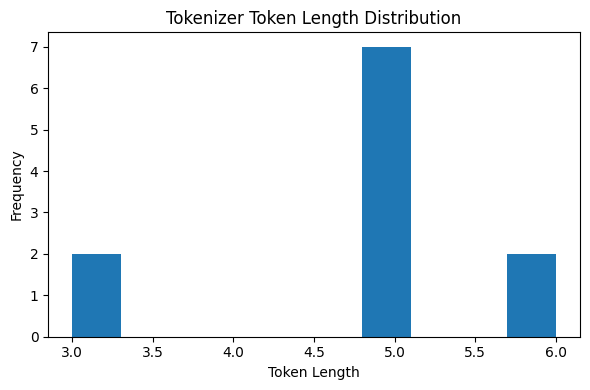

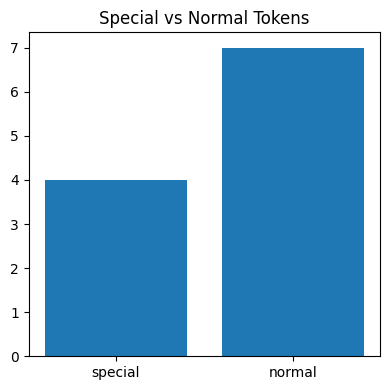

In [ ]:
import json
from collections import Counter
import matplotlib.pyplot as plt

vocab = {
    "<PAD>": 0,
    "<UNK>": 1,
    "<BOS>": 2,
    "<EOS>": 3,
    "low": 4,
    "lower": 5,
    "lowest": 6,
    "new": 7,
    "newest": 8,
    "hello": 9,
    "world": 10,
}


def save_tokenizer(filepath, vocab, metadata=None):
    if metadata is None:
        metadata = {}

    data = {
        "vocab": vocab,
        "metadata": metadata
    }

    with open(filepath, "w", encoding="utf-8") as f:
        json.dump(data, f, indent=2, ensure_ascii=False)

metadata = {
    "type": "wordpiece",
    "lowercase": True,
    "normalization": ["NFKC", "casefold"],
    "special_tokens": ["<PAD>", "<UNK>", "<BOS>", "<EOS>"]
}

save_tokenizer("tokenizer.json", vocab, metadata)


def load_tokenizer(filepath):
    with open(filepath, "r", encoding="utf-8") as f:
        data = json.load(f)

    vocab = data["vocab"]
    metadata = data.get("metadata", {})
    id_to_token = {int(i): t for t, i in vocab.items()}

    return vocab, id_to_token, metadata
loaded_vocab, id_to_token, loaded_metadata = load_tokenizer("tokenizer.json")

def encode(text, vocab):
    return [vocab.get(tok, vocab["<UNK>"]) for tok in text.split()]

def decode(ids, id_to_token):
    return " ".join(id_to_token.get(i, "<UNK>") for i in ids)
text = "low lowest unknown"
encoded = encode(text, loaded_vocab)
decoded = decode(encoded, id_to_token)

print("Text:", text)
print("Encoded:", encoded)
print("Decoded:", decoded)
assert vocab == loaded_vocab, "Vocabulary mismatch!"
print("✔ Tokenizer reload integrity verified!")

ids = list(vocab.values())
plt.figure(figsize=(6, 4))
plt.hist(ids, bins=10)
plt.title("Tokenizer Token ID Distribution")
plt.xlabel("Token ID")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

lengths = [len(token) for token in vocab]
plt.figure(figsize=(6, 4))
plt.hist(lengths, bins=10)
plt.title("Tokenizer Token Length Distribution")
plt.xlabel("Token Length")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

specials = set(metadata["special_tokens"])
counts = Counter("special" if tok in specials else "normal" for tok in vocab)

plt.figure(figsize=(4, 4))
plt.bar(counts.keys(), counts.values())
plt.title("Special vs Normal Tokens")
plt.tight_layout()
plt.show()
